In [18]:
# Import pandas
import pandas as pd
import numpy as np

In [2]:
! pip install geopandas
! pip install geoplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 6.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 39.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 10.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.4/18.4 MB 17.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.4 MB/s eta 0:00:00


In [19]:
import geopandas
import geoplot
from shapely.geometry import Point, Polygon 
import matplotlib.pyplot as plt

In [20]:
# Load in the listings data
df = pd.read_csv('data/listings.csv')

####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

In [ ]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.

In [21]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [32]:

#dfrm = df.groupby('neighbourhood')['price'].agg(['mean', 'std', 'count']).reset_index().round()
#dfrm
dfrm = df.groupby('neighbourhood')['price'].agg(['mean', 'std', 'count']).reset_index().round()

dfrm['sqrt_count'] = np.sqrt(dfrm['count'])

dfrm['std_of_mean'] = dfrm['std'] / dfrm['sqrt_count']

dfrm['lower_bound'] = dfrm['mean'] - (2 *dfrm['std_of_mean'])

dfrm['upper_bound'] = dfrm['mean'] + (2 *dfrm['std_of_mean'])
dfrm = dfrm.round()

dfrm_top = dfrm.sort_values('mean', ascending=False).head(10).reset_index()
dfrm_top


,index,neighbourhood,mean,std,count,sqrt_count,std_of_mean,lower_bound,upper_bound
0,82,Fort Wadsworth,800.0,NaN,1,1.0,NaN,NaN,NaN
1,220,Woodrow,700.0,NaN,1,1.0,NaN,NaN,NaN
2,175,Sea Gate,418.0,517.0,13,4.0,143.0,131.0,705.0
3,198,Tribeca,381.0,643.0,196,14.0,46.0,289.0,473.0
4,75,Flatiron District,367.0,489.0,77,9.0,56.0,256.0,478.0
5,22,Briarwood,366.0,1478.0,37,6.0,243.0,-120.0,852.0
6,73,Financial District,335.0,1220.0,522,23.0,53.0,228.0,442.0
7,216,Willowbrook,309.0,NaN,1,1.0,NaN,NaN,NaN
8,196,Tottenville,309.0,NaN,1,1.0,NaN,NaN,NaN
9,158,Prince's Bay,300.0,304.0,3,2.0,176.0,-51.0,651.0


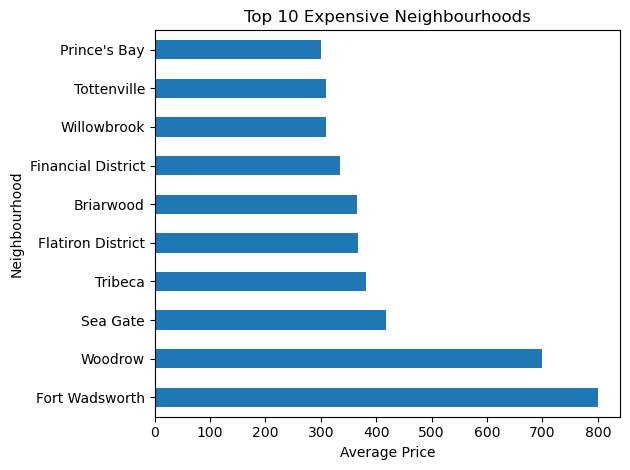

In [45]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price
plot = dfrm_top.plot.barh(x='neighbourhood', y='mean', legend=False)
plot.set_xlabel('Average Price')
plot.set_ylabel('Neighbourhood')
plot.set_title('Top 10 Expensive Neighbourhoods')
plt.tight_layout()
plt.show()


####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

In [46]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.
dfrm_bottom= dfrm.sort_values('mean', ascending=False).tail(10).reset_index()
dfrm_bottom

,index,neighbourhood,mean,std,count,sqrt_count,std_of_mean,lower_bound,upper_bound
0,150,Olinville,59.0,33.0,7,3.0,12.0,34.0,84.0
1,201,University Heights,58.0,26.0,23,5.0,5.0,47.0,69.0
2,89,Grant City,58.0,32.0,10,3.0,10.0,38.0,78.0
3,103,Hunts Point,57.0,21.0,24,5.0,4.0,48.0,66.0
4,9,"Bay Terrace, Staten Island",55.0,NaN,1,1.0,NaN,NaN,NaN
5,180,Soundview,52.0,25.0,18,4.0,6.0,40.0,64.0
6,141,New Brighton,52.0,11.0,4,2.0,6.0,41.0,63.0
7,157,Port Richmond,51.0,15.0,9,3.0,5.0,41.0,61.0
8,27,Bull's Head,50.0,9.0,3,2.0,5.0,40.0,60.0
9,181,South Beach,45.0,25.0,4,2.0,12.0,20.0,70.0


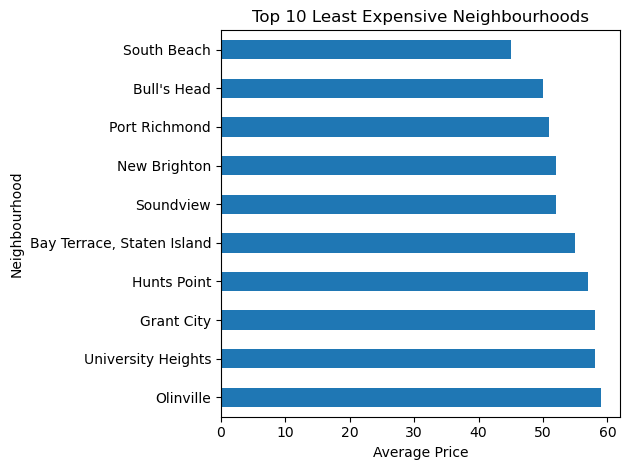

In [47]:
# we also would like to have the corresponding pivot table of the lowest 10
plot = dfrm_bottom.plot.barh(x='neighbourhood', y='mean', legend=False)
plot.set_xlabel('Average Price')
plot.set_ylabel('Neighbourhood')
plot.set_title('Top 10 Least Expensive Neighbourhoods')
plt.tight_layout()
plt.show()

#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!